In [1]:
!pip install -q -U watermark


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install -q efficient_apriori

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import efficient_apriori
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import combinations
from efficient_apriori import apriori
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Juliana Santimaria" 

Author: Juliana Santimaria



In [5]:
dados_departamentos = pd.read_csv('departamentos.csv')
dados_corredores = pd.read_csv('corredores.csv')
dados_produtos = pd.read_csv('produtos.csv')
dados_pedidos = pd.read_csv('pedidos.csv')
dados_transacoes = pd.read_csv('transacoes.csv')

In [6]:
conta_arrays = np.array([['dados_departamentos', len(dados_departamentos)],
                        ['dados_corredores', len(dados_corredores)],
                        ['dados_produtos', len(dados_produtos)],
                        ['dados_pedidos', len(dados_pedidos)],
                        ['dados_transacoes', len(dados_transacoes)]])

In [7]:
contagem = pd.DataFrame(conta_arrays, columns = ['Arquivo', 'Total de Registros'])

In [8]:
print(contagem)

               Arquivo Total de Registros
0  dados_departamentos                 21
1     dados_corredores                134
2       dados_produtos              49688
3        dados_pedidos            3421083
4     dados_transacoes           32434489


In [9]:
dados_departamentos.shape

(21, 2)

In [10]:
dados_departamentos.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
dados_corredores.shape

(134, 2)

In [12]:
dados_corredores.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
dados_produtos.shape

(49688, 4)

In [14]:
dados_produtos.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
dados_pedidos.shape

(3421083, 7)

In [16]:
dados_pedidos.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
dados_transacoes.shape

(32434489, 4)

In [18]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
dados_departamentos.isna().sum()

department_id    0
department       0
dtype: int64

In [20]:
dados_corredores.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [21]:
dados_produtos.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [22]:
dados_pedidos.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [23]:
dados_transacoes.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [24]:
%%time
dados_transacoes = dados_transacoes.merge(dados_pedidos, on = 'order_id', how = 'left')
dados_transacoes = dados_transacoes.merge(dados_produtos, on = 'product_id', how = 'left')
dados_transacoes = dados_transacoes.merge(dados_corredores, on = 'aisle_id', how = 'left')
dados_transacoes = dados_transacoes.merge(dados_departamentos, on = 'department_id', how = 'left')

CPU times: user 12.5 s, sys: 12.9 s, total: 25.4 s
Wall time: 29.5 s


In [25]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [26]:
dados_transacoes.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [27]:
dados_transacoes.isnull().sum() / len(dados_transacoes) * 100

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    6.40697
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
aisle                     0.00000
department                0.00000
dtype: float64

In [28]:
%%time
df_mod = pd.DataFrame(dados_transacoes.groupby('order_id')['product_id'])

CPU times: user 1min 5s, sys: 1min 7s, total: 2min 13s
Wall time: 2min 40s


In [29]:
df_mod.shape

(3214874, 2)

In [30]:
df_mod.head()

,0,1
0,2,0 33120 1 28985 2 9327 3 45918 4 ...
1,3,9 33754 10 24838 11 17704 12 2190...
2,4,17 46842 18 26434 19 39758 20 2776...
3,5,30 13176 31 15005 32 47329 33 2796...
4,6,56 40462 57 15873 58 41897 Name: prod...


In [31]:
prod = []

In [32]:
%%time
for i in range(len(df_mod[0])):
    prod.append(list(df_mod.iloc[i][1]))

CPU times: user 2min 10s, sys: 4.43 s, total: 2min 14s
Wall time: 2min 17s


In [33]:
transacoes = pd.DataFrame({'Id_Pedido' : df_mod[0], 'Produtos' : prod})

In [34]:
transacoes.head(10)

,Id_Pedido,Produtos
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"
5,7,"[34050, 46802]"
6,8,[23423]
7,9,"[21405, 47890, 11182, 2014, 29193, 34203, 1499..."
8,10,"[24852, 4796, 31717, 47766, 4605, 1529, 21137,..."
9,11,"[30162, 27085, 5994, 1313, 31506]"


In [35]:
dados_pedidos.sample(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2923987,34820,176411,prior,57,1,14,3.0
698720,639493,42103,prior,46,5,13,5.0
813845,2264254,48962,prior,8,1,11,30.0
1393436,648819,83747,prior,2,3,19,30.0
767108,1045226,46112,prior,12,5,8,21.0
219729,1881581,13275,prior,10,1,17,5.0
3021154,3027165,182318,prior,11,6,13,14.0
929134,2188261,55725,prior,93,4,11,0.0
1191520,2318581,71637,prior,22,3,16,7.0
1384075,3298859,83185,prior,3,4,17,8.0


In [36]:
contagem_maxima_pedido = dados_pedidos.groupby("user_id")['order_number'].aggregate(np.max).reset_index()
contagem_maxima_pedido.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [37]:
contagem_maxima_pedido = contagem_maxima_pedido.order_number.value_counts()
contagem_maxima_pedido.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

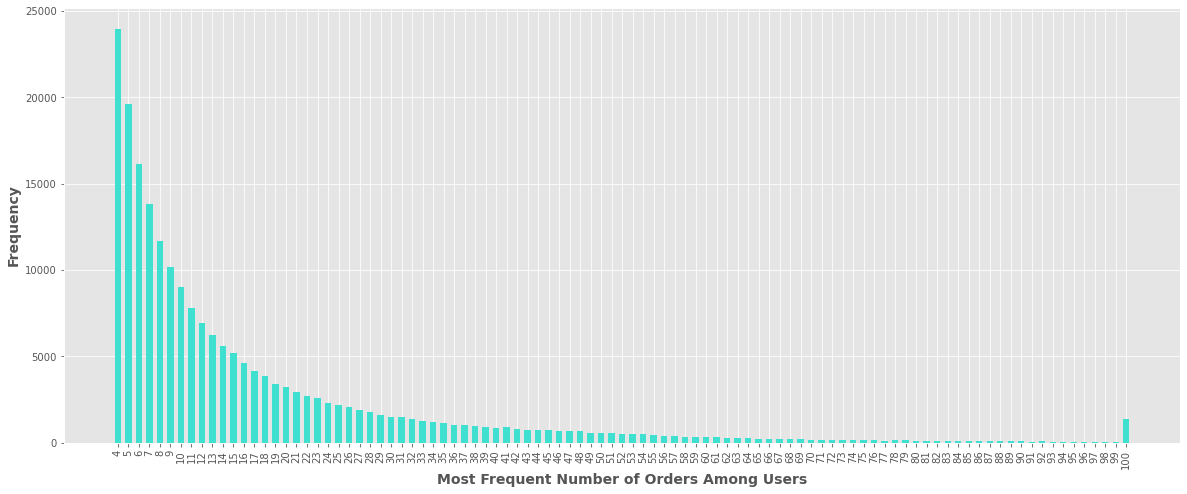

In [113]:
plt.style.use('ggplot')
plt.figure(figsize = (20,8))
plt.bar(contagem_maxima_pedido.index, contagem_maxima_pedido.values, color = 'turquoise', width = 0.6)
plt.xticks(contagem_maxima_pedido.index, rotation = 'vertical')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.xlabel('Most Frequent Number of Orders Among Users', fontsize = 14, fontweight = 'bold')
plt.show()

In [39]:
dados_pedidos.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [40]:
dados_pedidos.order_dow.value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

In [41]:
x = [0,1,2,3,4,5,6]

In [42]:
y = dados_pedidos['order_dow'].value_counts().sort_index().tolist()

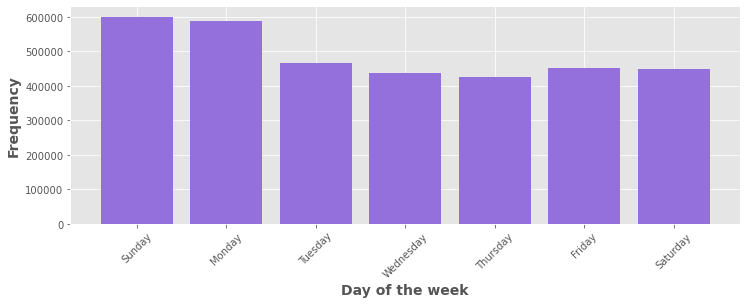

In [114]:
plt.figure(figsize = (12,4))
plt.bar(x, y, color = 'mediumpurple')
plt.xlabel('Day of the week', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.xticks(x, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation = 45)
plt.show()

In [44]:
dados_pedidos.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [45]:
x1 = list(range(0,24))
print(x1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [46]:
y1 = []
for i in range(0,24):
    y1.append(dados_pedidos[dados_pedidos['order_hour_of_day']==i].shape[0])
print(y1)

[22758, 12398, 7539, 5474, 5527, 9569, 30529, 91868, 178201, 257812, 288418, 284728, 272841, 277999, 283042, 283639, 272553, 228795, 182912, 140569, 104292, 78109, 61468, 40043]


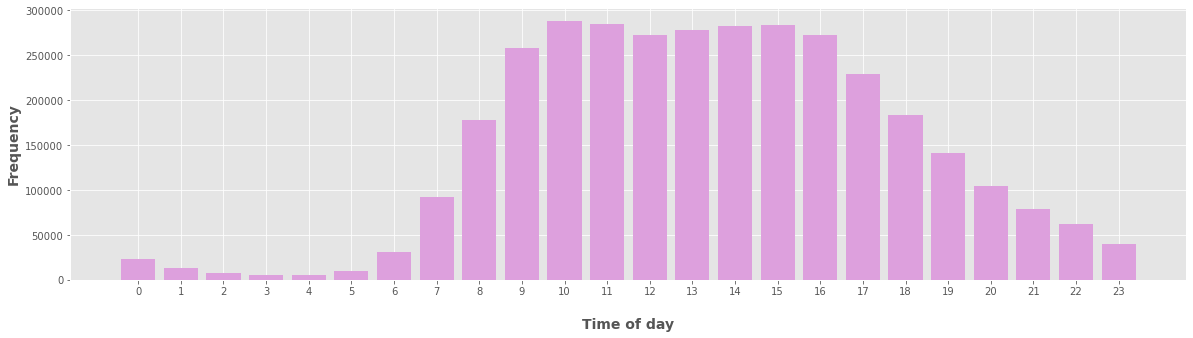

In [47]:
plt.figure(figsize = (20,5))
plt.bar(x1, y1, color = 'plum')
plt.xticks(np.arange(0,24,1))
plt.xlabel('\nTime of day', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

In [48]:
frequencia_por_hora = dados_pedidos.groupby('order_hour_of_day').size()
frequencia_por_hora.head()

order_hour_of_day
0    22758
1    12398
2     7539
3     5474
4     5527
dtype: int64

In [49]:
frequencia_por_hora.head(24)

order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
dtype: int64

In [50]:
x2 = frequencia_por_hora.index.tolist()
y2 = frequencia_por_hora.values.tolist()

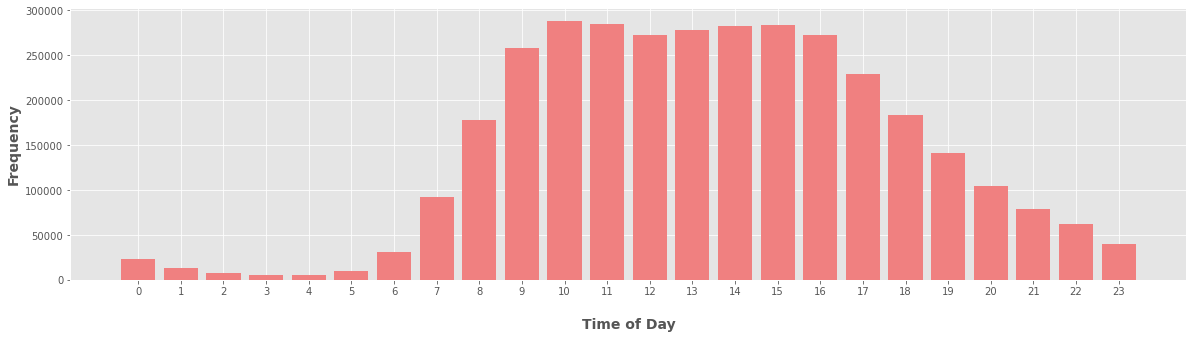

In [51]:
plt.figure(figsize = (20,5))
plt.bar(x2, y2,color = 'lightcoral')
plt.xticks(np.arange(0,24,1))
plt.xlabel('\nTime of Day', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

In [52]:
dados_pedidos.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [53]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [54]:
contagem_departamento = dados_transacoes['department'].value_counts()
contagem_departamento.head()

produce       9479291
dairy eggs    5414016
snacks        2887550
beverages     2690129
frozen        2236432
Name: department, dtype: int64

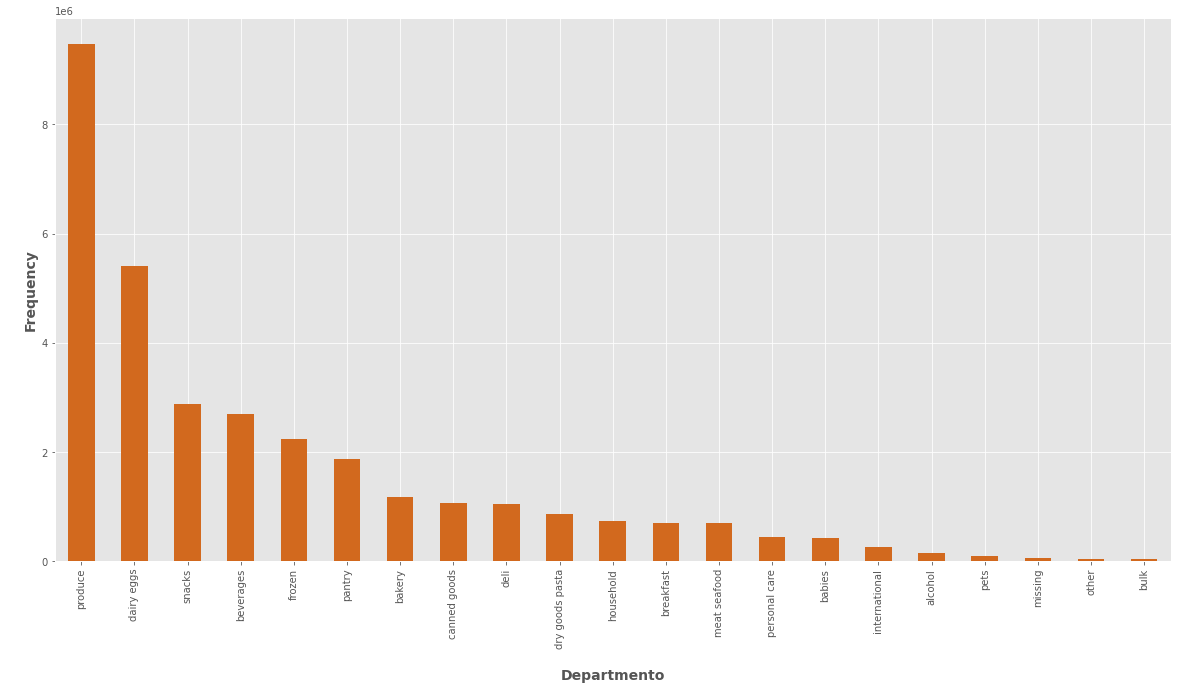

In [55]:
fig = plt.figure(figsize = (20,10))
contagem_departamento.plot(kind = "bar", color = 'chocolate')
plt.xticks(rotation = 90)
plt.xlabel('\nDepartmento', fontsize = 14, fontweight = 'bold')
plt.ylabel('\nFrequency', fontsize = 14, fontweight = 'bold')
plt.show()

In [56]:
transacoes_produtos = pd.merge(dados_transacoes, dados_produtos, on='product_id', suffixes=('', '_produto'))
transacoes_produtos.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,product_name_produto,aisle_id_produto,department_id_produto
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16


In [57]:
transacoes_departamentos = pd.merge(transacoes_produtos, dados_departamentos, on='department_id')
transacoes_departamentos.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department_x,product_name_produto,aisle_id_produto,department_id_produto,department_y
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16,dairy eggs


In [58]:
contagem_departamentos = transacoes_departamentos['department_x'].value_counts()
contagem_departamentos.head()

produce       9479291
dairy eggs    5414016
snacks        2887550
beverages     2690129
frozen        2236432
Name: department_x, dtype: int64

In [59]:
departamento_mais_pedidos = contagem_departamentos.idxmax()

In [60]:
print(departamento_mais_pedidos)

produce


In [61]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [62]:
contagem = dados_transacoes['aisle'].value_counts()

In [63]:
contagem[0:20]

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

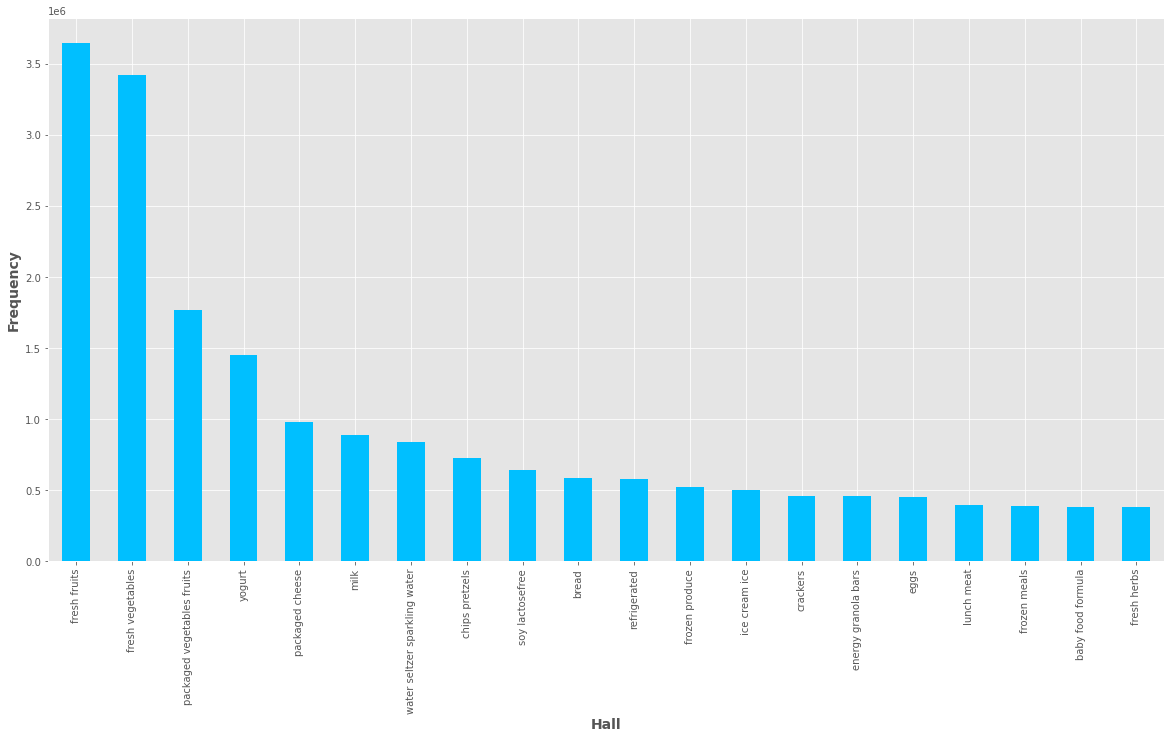

In [64]:
fig = plt.figure(figsize = (20,10))
contagem[0:20].plot(kind = "bar", color = 'deepskyblue')
plt.xticks(rotation = 90)
plt.xlabel('Hall', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

In [65]:
frequencia_produtos = dados_transacoes['product_id'].value_counts()

produto_para_corredor = dict(zip(dados_produtos['product_id'], dados_produtos['aisle_id']))

id_para_nome_corredor = dict(zip(dados_corredores['aisle_id'], dados_corredores['aisle']))

frequencia_corredores = {}
for produto, freq in frequencia_produtos.items():
    corredor_id = produto_para_corredor.get(produto)
    if corredor_id:
        corredor_nome = id_para_nome_corredor.get(corredor_id, "Corredor Desconhecido")
        frequencia_corredores[corredor_nome] = frequencia_corredores.get(corredor_nome, 0) + freq

principais_corredores = sorted(frequencia_corredores.items(), key=lambda x: x[1], reverse=True)[:20]

for corredor, freq in principais_corredores:
    print(f"Corredor: {corredor}, Frequência: {freq}")

Corredor: fresh fruits, Frequência: 3642188
Corredor: fresh vegetables, Frequência: 3418021
Corredor: packaged vegetables fruits, Frequência: 1765313
Corredor: yogurt, Frequência: 1452343
Corredor: packaged cheese, Frequência: 979763
Corredor: milk, Frequência: 891015
Corredor: water seltzer sparkling water, Frequência: 841533
Corredor: chips pretzels, Frequência: 722470
Corredor: soy lactosefree, Frequência: 638253
Corredor: bread, Frequência: 584834
Corredor: refrigerated, Frequência: 575881
Corredor: frozen produce, Frequência: 522654
Corredor: ice cream ice, Frequência: 498425
Corredor: crackers, Frequência: 458838
Corredor: energy granola bars, Frequência: 456386
Corredor: eggs, Frequência: 452134
Corredor: lunch meat, Frequência: 395130
Corredor: frozen meals, Frequência: 390299
Corredor: baby food formula, Frequência: 382456
Corredor: fresh herbs, Frequência: 377741


In [66]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [67]:
contagem_produtos = dados_transacoes['product_name'].value_counts()

In [68]:
contagem_produtos.head()

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Name: product_name, dtype: int64

In [69]:
contagem_produtos[0:20]

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64

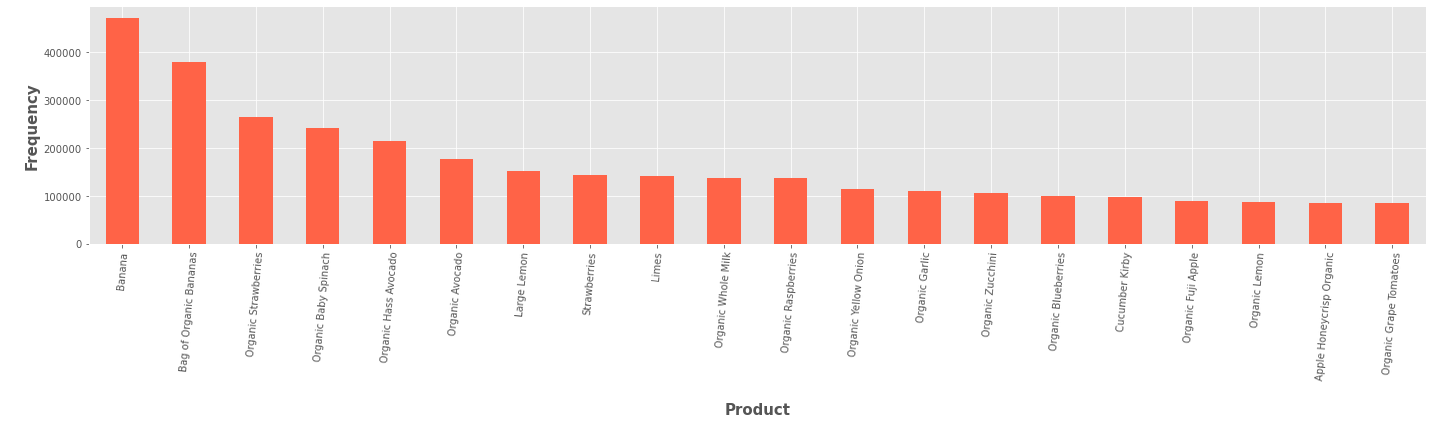

In [70]:
fig = plt.figure(figsize = (20,6))
contagem_produtos[0:20].plot(kind = "bar", color = 'tomato')
plt.xticks(rotation = 85)
plt.xlabel('\nProduct', fontsize = 15, fontweight = 'bold')
plt.ylabel('\nFrequency', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [71]:
%%time
df_temp1 = dados_transacoes.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
df_temp1 = df_temp1.sort_values('total', ascending = False).reset_index()

CPU times: user 2.53 s, sys: 504 ms, total: 3.03 s
Wall time: 3.57 s


In [72]:
labels = list(df_temp1.product_name[0:20])
reorder = list(df_temp1.reorders[0:20])
total = list(df_temp1.total[0:20])    

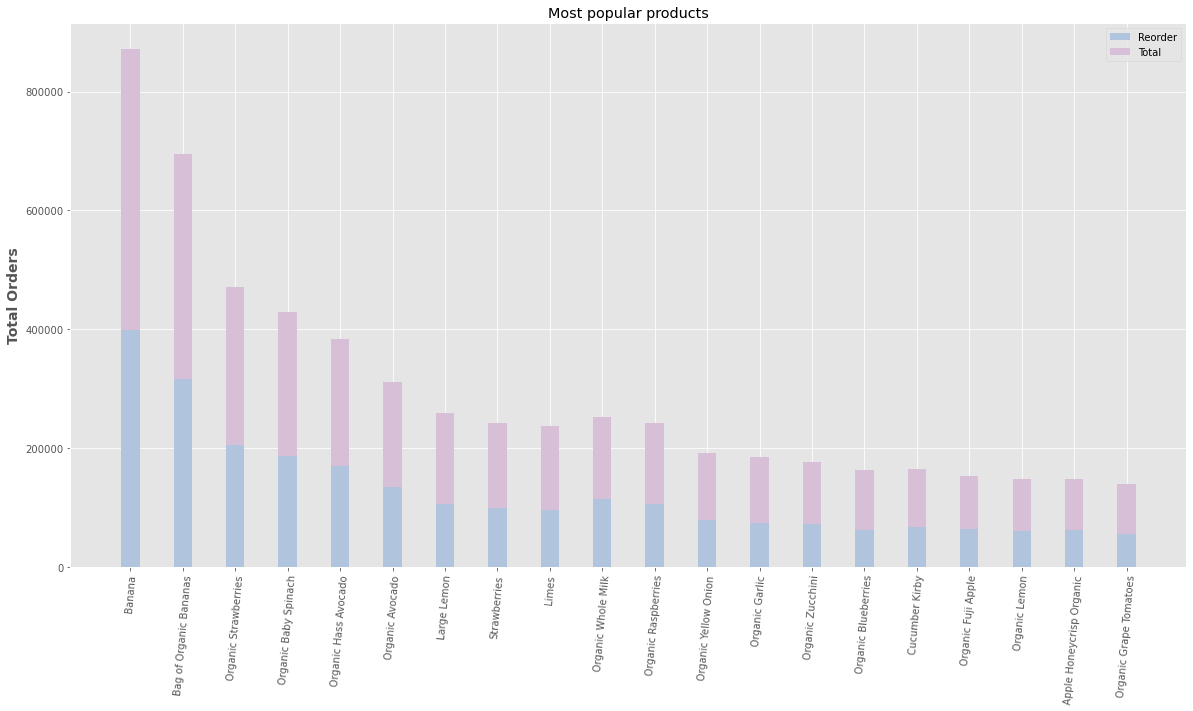

In [73]:
width = 0.35 
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(labels, reorder, width, label = 'Reorder', color = 'lightsteelblue')
ax.bar(labels, total, width, bottom = reorder, label = 'Total', color = 'thistle')
ax.set_ylabel('Total Orders', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title("Most popular products")
plt.xticks(rotation = 85)
plt.show()

In [74]:
df_temp2 = dados_transacoes.groupby(["department"])["reordered"].aggregate("mean").reset_index()
df_temp2.head()

,department,reordered
0,alcohol,0.569924
1,babies,0.578971
2,bakery,0.628141
3,beverages,0.653460
4,breakfast,0.560922


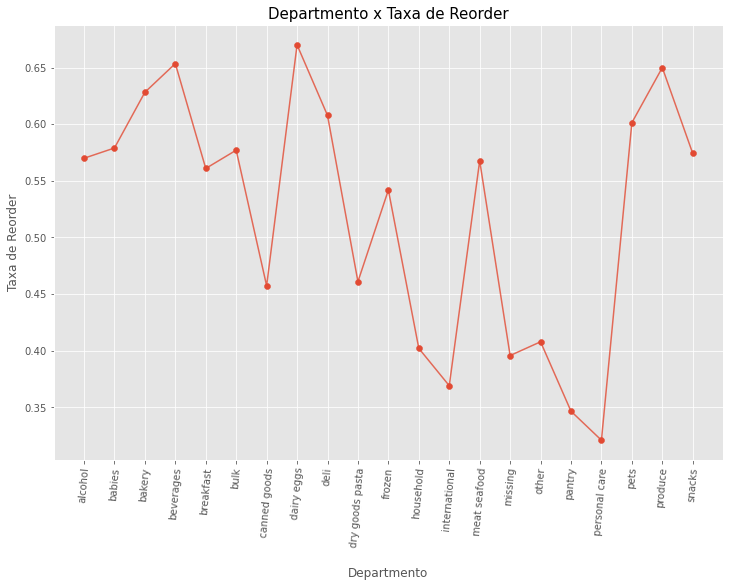

In [75]:
plt.figure(figsize = (12,8))
plt.plot(list(df_temp2['department']), df_temp2['reordered'].values, alpha=0.8)
plt.scatter(list(df_temp2['department']), df_temp2['reordered'].values)
plt.ylabel('Taxa de Reorder', fontsize = 12)
plt.xlabel('\nDepartmento', fontsize = 12)
plt.title("Departmento x Taxa de Reorder", fontsize = 15)
plt.xticks(rotation = 85)
plt.show()

In [76]:
%%time
df_temp3 = dados_transacoes.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
df_temp3 = df_temp3.sort_values('total', ascending = False).reset_index()

CPU times: user 1.53 s, sys: 445 ms, total: 1.98 s
Wall time: 2.17 s


In [77]:
df_temp3.head()

,department,total,reorders
0,produce,9479291,6160710
1,dairy eggs,5414016,3627221
2,snacks,2887550,1657973
3,beverages,2690129,1757892
4,frozen,2236432,1211890


In [78]:
labels = list(df_temp3.department[0:20])
reorder = list(df_temp3.reorders[0:20])
total = list(df_temp3.total[0:20])

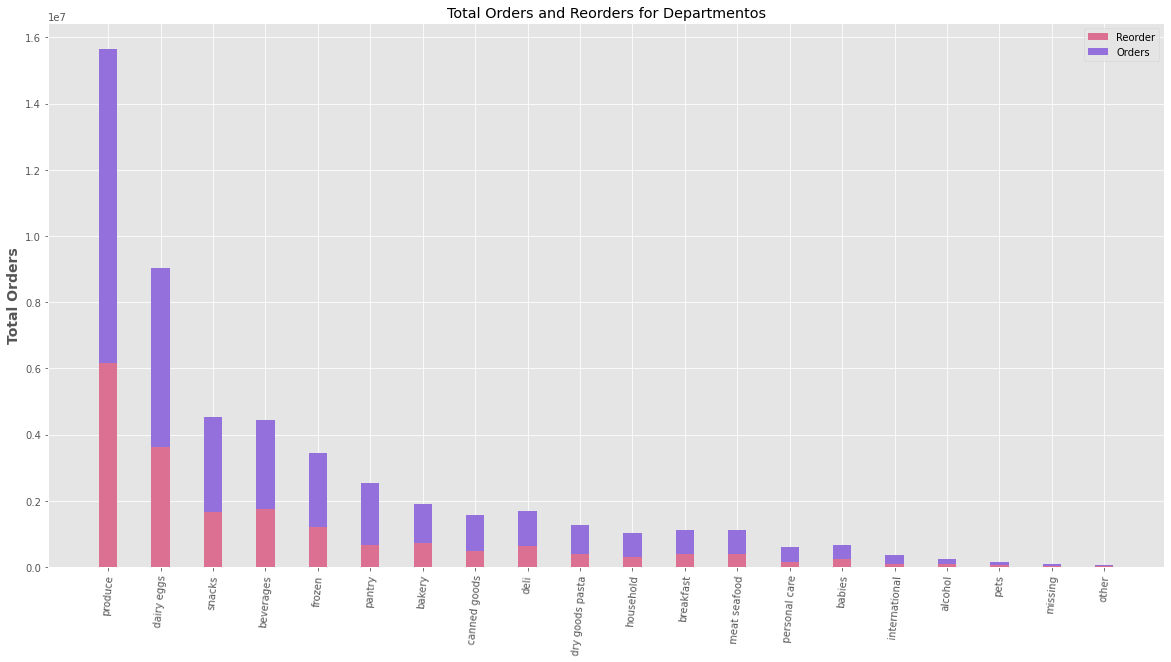

In [79]:
width = 0.35  
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(labels, reorder, width, label = 'Reorder', color = 'palevioletred')
ax.bar(labels, total, width, bottom = reorder, label = 'Orders', color = 'mediumpurple')
ax.set_ylabel('Total Orders', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title("Total Orders and Reorders for Departmentos")
plt.xticks(rotation = 85)
plt.show()

In [80]:
%%time
df_temp4 = dados_transacoes.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
df_temp4.head()

CPU times: user 1.63 s, sys: 438 ms, total: 2.07 s
Wall time: 2.26 s


,aisle,reordered
0,air fresheners candles,0.309052
1,asian foods,0.351132
2,baby accessories,0.550980
3,baby bath body care,0.295770
4,baby food formula,0.590259


In [81]:
list(df_temp4['aisle'])[0:20]

['air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce']

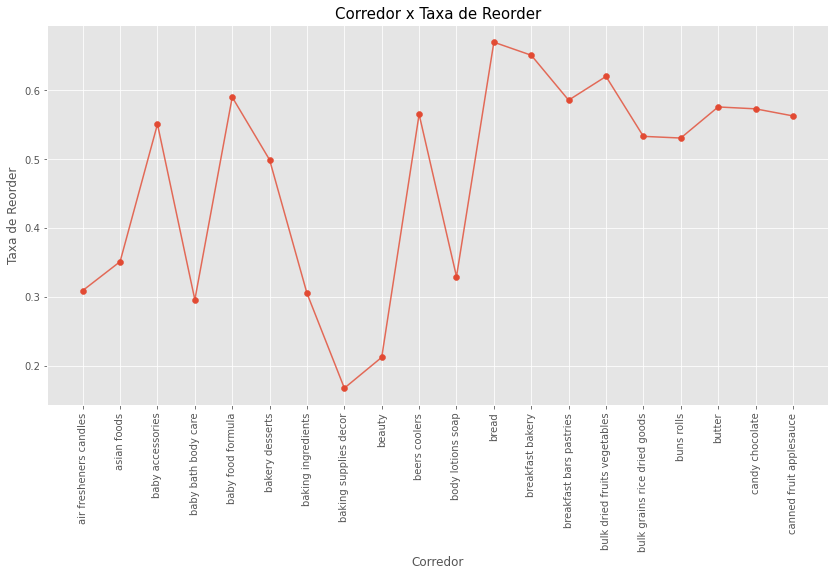

In [82]:
plt.figure(figsize=(14,7))
plt.plot(list(df_temp4['aisle'])[0:20], df_temp4['reordered'].values[0:20], alpha=0.8)
plt.scatter(list(df_temp4['aisle'])[0:20], df_temp4['reordered'].values[0:20])
plt.ylabel('Taxa de Reorder', fontsize=12)
plt.xlabel('Corredor', fontsize=12)
plt.title("Corredor x Taxa de Reorder", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

In [83]:
%%time
df_temp5 = dados_transacoes.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
df_temp5 = df_temp5.sort_values('total', ascending = False).reset_index()


CPU times: user 1.67 s, sys: 491 ms, total: 2.16 s
Wall time: 2.38 s


In [84]:
df_temp5.head()

,aisle,total,reorders
0,fresh fruits,3642188,2615469
1,fresh vegetables,3418021,2032172
2,packaged vegetables fruits,1765313,1127177
3,yogurt,1452343,997018
4,packaged cheese,979763,573383


In [85]:
labels = list(df_temp5.aisle[0:20])
reorder = list(df_temp5.reorders[0:20])
total = list(df_temp5.total[0:20])

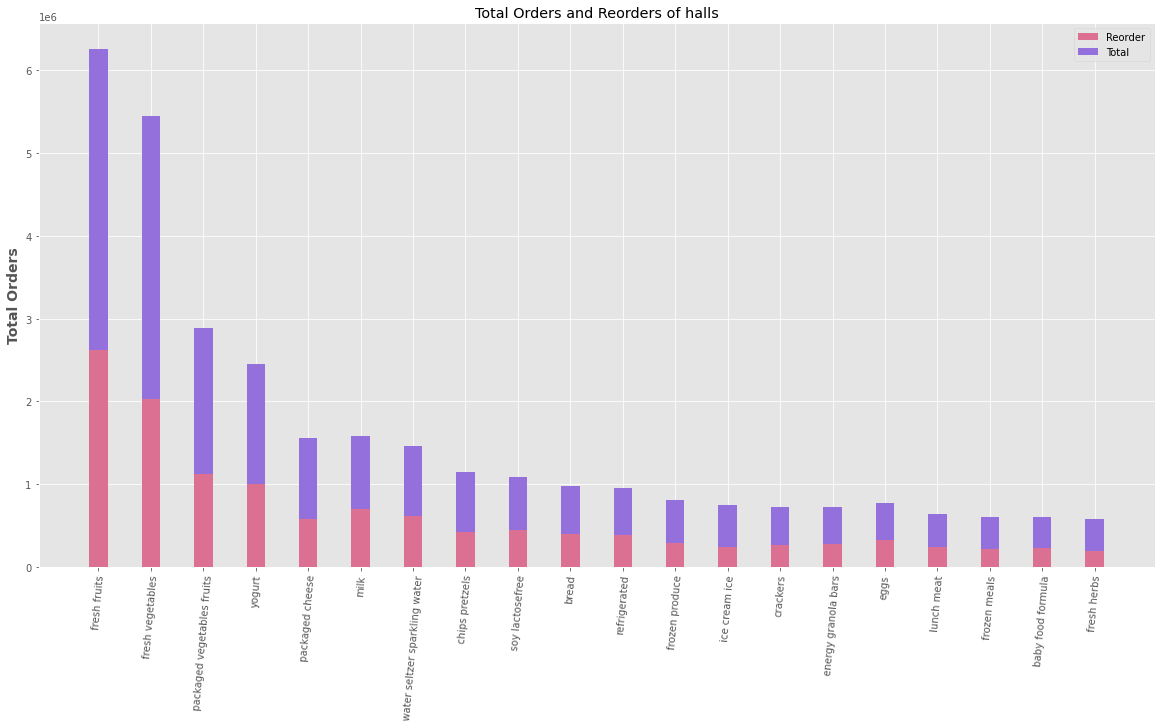

In [86]:
width = 0.35      
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(labels, reorder, width, label = 'Reorder', color = 'palevioletred')
ax.bar(labels, total, width, bottom = reorder, label = 'Total', color = 'mediumpurple')
ax.set_ylabel('Total Orders', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title("Total Orders and Reorders of halls")
plt.xticks(rotation = 85)
plt.show()

In [87]:
dados_transacoes["add_to_cart_order_mod"] = dados_transacoes["add_to_cart_order"].copy()

In [88]:
dados_transacoes["add_to_cart_order_mod"].loc[dados_transacoes["add_to_cart_order_mod"] > 70] = 70

In [89]:
grouped_df = dados_transacoes.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

In [90]:
grouped_df.head(10)

,add_to_cart_order_mod,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383
5,6,0.600420
6,7,0.585687
7,8,0.573247
8,9,0.561474
9,10,0.551018


In [91]:
transacoes.head()

,Id_Pedido,Produtos
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"


In [92]:
transacoes_tup = [tuple(row) for row in transacoes['Produtos'].tolist()]

In [93]:
%%time
itemsets_ap, rules_ap = apriori(transacoes_tup[:500000], min_support = 0.01, min_confidence = 0.2)

CPU times: user 2.21 s, sys: 263 ms, total: 2.48 s
Wall time: 2.74 s


In [94]:
rules_ap

[{21137} -> {13176},
 {21903} -> {13176},
 {27966} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {21903} -> {24852},
 {28204} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852}]

In [95]:
item_A = [27966,47209,21137,47766,21903,49683,47626,28204,16797,21903,21137,27966]
item_B = [13176,13176,24852,24852,24852,24852,24852,24852,24852,13176,13176,21137]
temp = pd.DataFrame()
temp['itemA'] = item_A
temp['itemB'] = item_B

In [96]:
support_A = []
support_B = []
support_AB = []
confidence_AB = []
lift_AB = []

In [97]:
for i in range(len(temp)):

    support_A.append(itemsets_ap[1][tuple([temp['itemA'][i],])] / 500000)

    support_B.append(itemsets_ap[1][tuple([temp['itemB'][i],])] / 500000)

    if tuple([temp['itemA'][i],temp['itemB'][i]]) in itemsets_ap[2].keys():
        support_AB.append(itemsets_ap[2][tuple([temp['itemA'][i],temp['itemB'][i]])] / 500000)
    else:
        support_AB.append(itemsets_ap[2][tuple([temp['itemB'][i],temp['itemA'][i]])] / 500000)

    confidence_AB.append(support_AB[i] / support_A[i])

    lift_AB.append(support_AB[i] / (support_A[i] * support_B[i]))

In [98]:
df_rules_ap = pd.DataFrame()
df_rules_ap['product_id'] = item_A
df_rules_ap = df_rules_ap.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap['Product_A'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['product_id'] = item_B
df_rules_ap = df_rules_ap.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap['Product_B'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['Support_A'] = support_A
df_rules_ap['Support_B'] = support_B
df_rules_ap['Support_AB'] = support_AB
df_rules_ap['Confidence_AB'] = confidence_AB
df_rules_ap['Lift_AB'] = lift_AB

In [99]:
df_rules_ap

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
2,Organic Strawberries,Banana,0.082550,0.147194,0.017596,0.213156,1.448127
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
4,Organic Baby Spinach,Banana,0.075000,0.147194,0.016016,0.213547,1.450784
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
9,Organic Baby Spinach,Bag of Organic Bananas,0.075000,0.117802,0.015500,0.206667,1.754356


In [100]:
df_rules_ap.sort_values(by = 'Confidence_AB', ascending = False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
11,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
10,Organic Strawberries,Bag of Organic Bananas,0.082550,0.117802,0.019122,0.231641,1.966362
4,Organic Baby Spinach,Banana,0.075000,0.147194,0.016016,0.213547,1.450784


In [101]:
df_rules_ap.sort_values(by = 'Lift_AB', ascending = False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
11,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
10,Organic Strawberries,Bag of Organic Bananas,0.082550,0.117802,0.019122,0.231641,1.966362
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
9,Organic Baby Spinach,Bag of Organic Bananas,0.075000,0.117802,0.015500,0.206667,1.754356


In [102]:
%%time
itemsets_ap_1, rules_ap_1 = apriori(transacoes_tup[:500000], min_support = 0.005, min_confidence = 0.2)

CPU times: user 3.94 s, sys: 240 ms, total: 4.18 s
Wall time: 4.3 s


In [103]:
rules_ap_1

[{4605} -> {24852},
 {4920} -> {24852},
 {5876} -> {13176},
 {5876} -> {47209},
 {8277} -> {13176},
 {8277} -> {24852},
 {9076} -> {24852},
 {19057} -> {13176},
 {21137} -> {13176},
 {21903} -> {13176},
 {22935} -> {13176},
 {27966} -> {13176},
 {30391} -> {13176},
 {37646} -> {13176},
 {39275} -> {13176},
 {45007} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {30391} -> {21137},
 {39275} -> {21137},
 {21903} -> {24852},
 {24964} -> {22935},
 {26209} -> {24852},
 {27845} -> {24852},
 {28204} -> {24852},
 {30489} -> {24852},
 {37646} -> {24852},
 {40706} -> {24852},
 {42265} -> {24852},
 {44632} -> {24852},
 {45066} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852},
 {31717} -> {26209},
 {30391} -> {47209}]

In [104]:
item_A1 = [27966,47209,4605,21137,47766,21903,49683,5876,37646,40706,47626,5876,30391,22935,37646,31717,
           28204,27845,24964,45066,9076,16797,21903,8277,30391,21137,27966,19057,26209,45007,39275,30489,
           42265,30391,8277,4920,39275,44632]
item_B1 = [13176,13176,24852,24852,24852,24852,24852,47209,24852,24852,24852,13176,13176,13176,13176,26209,
           24852,24852,22935,24852,24852,24852,13176,24852,47209,13176,21137,13176,24852,13176,21137,24852,
           24852,21137,13176,24852,13176,24852]
temp1 = pd.DataFrame()
temp1['itemA'] = item_A1
temp1['itemB'] = item_B1

In [105]:
support_A1 = []
support_B1 = []
support_AB1 = []
confidence_AB1 = []
lift_AB1 = []

In [106]:
for i in range(len(temp1)):
    
    support_A1.append(itemsets_ap_1[1][tuple([temp1['itemA'][i],])] / 500000)
    
    support_B1.append(itemsets_ap_1[1][tuple([temp1['itemB'][i],])] / 500000)
    
    if tuple([temp1['itemA'][i],temp1['itemB'][i]]) in itemsets_ap_1[2].keys():
        
        support_AB1.append(itemsets_ap_1[2][tuple([temp1['itemA'][i],temp1['itemB'][i]])] / 500000)
    
    else:
        
        support_AB1.append(itemsets_ap_1[2][tuple([temp1['itemB'][i],temp1['itemA'][i]])] / 500000)
    
    confidence_AB1.append(support_AB1[i] / support_A1[i])
    
    lift_AB1.append(support_AB1[i] / (support_A1[i] * support_B1[i]))

In [107]:
df_rules_ap1 = pd.DataFrame()
df_rules_ap1['product_id'] = item_A1
df_rules_ap1 = df_rules_ap1.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap1['Product_A'] = df_rules_ap1['product_name']
df_rules_ap1 = df_rules_ap1.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap1['product_id'] = item_B1
df_rules_ap1 = df_rules_ap1.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap1['Product_B'] = df_rules_ap1['product_name']
df_rules_ap1 = df_rules_ap1.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap1['Support_A'] = support_A1
df_rules_ap1['Support_B'] = support_B1
df_rules_ap1['Support_AB'] = support_AB1
df_rules_ap1['Confidence_AB'] = confidence_AB1
df_rules_ap1['Lift_AB'] = lift_AB1

In [108]:
df_rules_ap1.sort_values(by = 'Confidence_AB', ascending = False).head(10)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
16,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
19,Honeycrisp Apple,Banana,0.024774,0.147194,0.008832,0.356503,2.421993
6,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
27,Organic Large Extra Fancy Fuji Apple,Bag of Organic Bananas,0.023374,0.117802,0.007330,0.313596,2.662063
4,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
35,Seedless Red Grapes,Banana,0.026054,0.147194,0.007750,0.297459,2.020864
2,Yellow Onions,Banana,0.022814,0.147194,0.006750,0.295871,2.010075
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
20,Blueberries,Banana,0.017674,0.147194,0.005186,0.293425,1.993460
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037


In [109]:
df_rules_ap1.sort_values(by = 'Lift_AB', ascending = False).head(10)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
15,Organic Cilantro,Limes,0.021334,0.043640,0.005342,0.250398,5.737819
18,Organic Garlic,Organic Yellow Onion,0.034158,0.035306,0.006868,0.201066,5.694942
7,Organic Lemon,Organic Hass Avocado,0.027242,0.066218,0.006534,0.239850,3.622130
24,Organic Cucumber,Organic Hass Avocado,0.025056,0.066218,0.005396,0.215358,3.252252
26,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
30,Organic Blueberries,Organic Strawberries,0.031188,0.082550,0.007284,0.233551,2.829211
27,Organic Large Extra Fancy Fuji Apple,Bag of Organic Bananas,0.023374,0.117802,0.007330,0.313596,2.662063
16,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
33,Organic Cucumber,Organic Strawberries,0.025056,0.082550,0.005138,0.205061,2.484078


In [110]:
%watermark -a "Juliana Santimaria"

Author: Juliana Santimaria



In [111]:
#%watermark -v -m

In [112]:
#%watermark --iversions